In [17]:
from qiskit import *
from qiskit_aer import Aer, StatevectorSimulator
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator, state_fidelity, Statevector

### Part 1: HSHT Circuit


In [18]:
# Define the circuit with one qubit
qc0 = QuantumCircuit(1)

# Apply H, S, and T gates in sequence
qc0.h(0)
qc0.s(0)
qc0.h(0)
qc0.t(0)

qc1 = QuantumCircuit(1)
qc1.x(0)
# Apply H, S, and T gates in sequence
qc1.h(0)
qc1.s(0)
qc1.h(0)
qc1.t(0)


backend = Aer.get_backend('statevector_simulator')
job0 = backend.run(qc0)
job1 = backend.run(qc1)

state0 = job0.result().get_statevector()
state1 = job1.result().get_statevector()

print("Part 1: Testing HSHT circuit")
print(f"Output for |0> input: {state0}")
print(f"Output for |1> input: {state1}")

Part 1: Testing HSHT circuit
Output for |0> input: Statevector([0.5       +5.00000000e-01j, 0.70710678-5.55111512e-17j],
            dims=(2,))
Output for |1> input: Statevector([5.00000000e-01-0.5j       , 1.66533454e-16+0.70710678j],
            dims=(2,))


### Part 2: Check HSHT reversibility


In [19]:
op = Operator(qc0)
op_dag = op.conjugate().transpose()
identity = op.compose(op_dag)
is_unitary = np.allclose(identity.data, np.eye(2))


print("\nPart 2: Testing HSHT Reversibility")
print(f"Is HSHT reversible? {is_unitary}")


Part 2: Testing HSHT Reversibility
Is HSHT reversible? True


### Part 3: Create Bell State circuit


In [20]:
# Define a two-qubit quantum circuit
circuit_bell = QuantumCircuit(2)

# Apply H gate to the first qubit (creating superposition)
circuit_bell.h(0)

# Apply CNOT gate with the first qubit as control and the second as target
circuit_bell.cx(0, 1)

# Backend for simulation
simulator = StatevectorSimulator()

# Define the input states |00⟩, |01⟩, |10⟩, |11⟩
input_states = [
    [1, 0, 0, 0],  # |00>
    [0, 1, 0, 0],  # |01>
    [0, 0, 1, 0],  # |10>
    [0, 0, 0, 1]   # |11>
]

# Simulate for each input state
for i, input_state in enumerate(input_states):
    # Initialize the input state
    circuit_test = QuantumCircuit(2)
    circuit_test.initialize(input_state, [0, 1])
    circuit_test.compose(circuit_bell, inplace=True)
    
    # Transpile and run the circuit on the statevector simulator
    transpiled_circuit = transpile(circuit_test, simulator)
    result = simulator.run(transpiled_circuit).result()
    
    # Get the output statevector
    output_statevector = result.get_statevector()
    print(f"Output for input state |{i:02b}⟩:", output_statevector)


Output for input state |00⟩: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Output for input state |01⟩: Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j],
            dims=(2, 2))
Output for input state |10⟩: Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Output for input state |11⟩: Statevector([ 0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j,
              0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2))


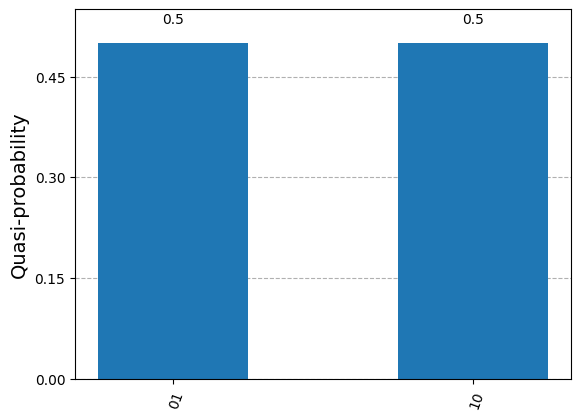

In [21]:
stats  = result.get_counts(transpiled_circuit)
plot_histogram(stats)